### Project Milestone 5

### Merging the Data and Storing in a Database/Visualizing Data


### Import all the required libraries

In [1]:
# Import all the required libraries
import sqlite3
from sqlite3 import Error
import pandas as pd
import numpy as np

### Database Connection

In [2]:
# Defining a Function to create database connection
def db_connect(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as err:
        print(err)
        if conn is not None:
            conn.close()

### Milestone 2 data - Flat File Data insertion into the database.

In [3]:
dbfile = 'mydata.sqlite'
# Calling dbconnect file.
conn = db_connect(dbfile)

if conn is not None:
    c = conn.cursor()

    # Creating a table. 
    c.execute('CREATE TABLE IF NOT EXISTS FLATFILE_DATA_MS2 ' 
   '(Bowler_Name VARCHAR,'
    'Span VARCHAR,'
    'Debut_Year VARCHAR,'
    'Retirement_Year VARCHAR,'
    'Matches VARCHAR,'
    'Innings VARCHAR,'
    'Balls VARCHAR,'
    'Runs VARCHAR,'
    'Wickets VARCHAR,'
    'Average VARCHAR,'
    'Economy VARCHAR,'
    'Strike_Rate VARCHAR,'
    'five_Wkt_Haul VARCHAR,'
    'ten_Wkt_Haul VARCHAR,'
    'Country VARCHAR)')

    # Creat a data frame using csv file.

    df = pd.read_csv('Bowler_Stats_CSV_MS2.csv', names = ["Bowler_Name","Span","Debut_Year","Retirement_Year","Matches","Innings","Balls","Runs","Wickets","Average","Economy","Strike_Rate","five_Wkt_Haul","ten_Wkt_Haul","Country"])
    df.to_sql(name='FLATFILE_DATA_MS2', con=conn, if_exists='replace', index=False)

    conn.close()
    print('SQL insert process finished')
else:
    print('Connection to database failed')

SQL insert process finished


In [4]:
# Connect to the Database.
conn = db_connect(dbfile)
# Initialise variable to execute queries.
c = conn.cursor()
# To check the number of records from flatfile- milestone2 table
rows = c.execute("SELECT count(*) FROM FLATFILE_DATA_MS2")
for row in rows:
    print(row)

(563,)


In [5]:
# To check the number of records from flatfile- milestone2 table
dbq="SELECT country, sum(wickets) as count FROM FLATFILE_DATA_MS2 where country<>'Country' group by country"

In [7]:
# Import the plot library
import matplotlib.pyplot as plt

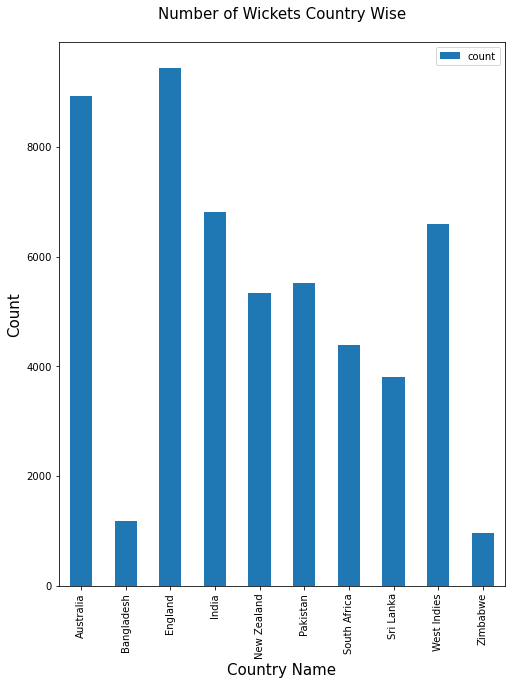

In [8]:
# Plotting a Bar Graph for Country vs Wickets count(i.e grouping each country players wickets)
df = pd.read_sql_query(dbq,conn)
ax = df.plot(x="Country", y="count", kind="bar", fontsize=10, figsize=(8,10))
ax.set_title('Number of Wickets Country Wise\n', fontsize=15)
ax.set_xlabel('Country Name', fontsize=15)
ax.set_ylabel('Count', fontsize=15);
plt.show()

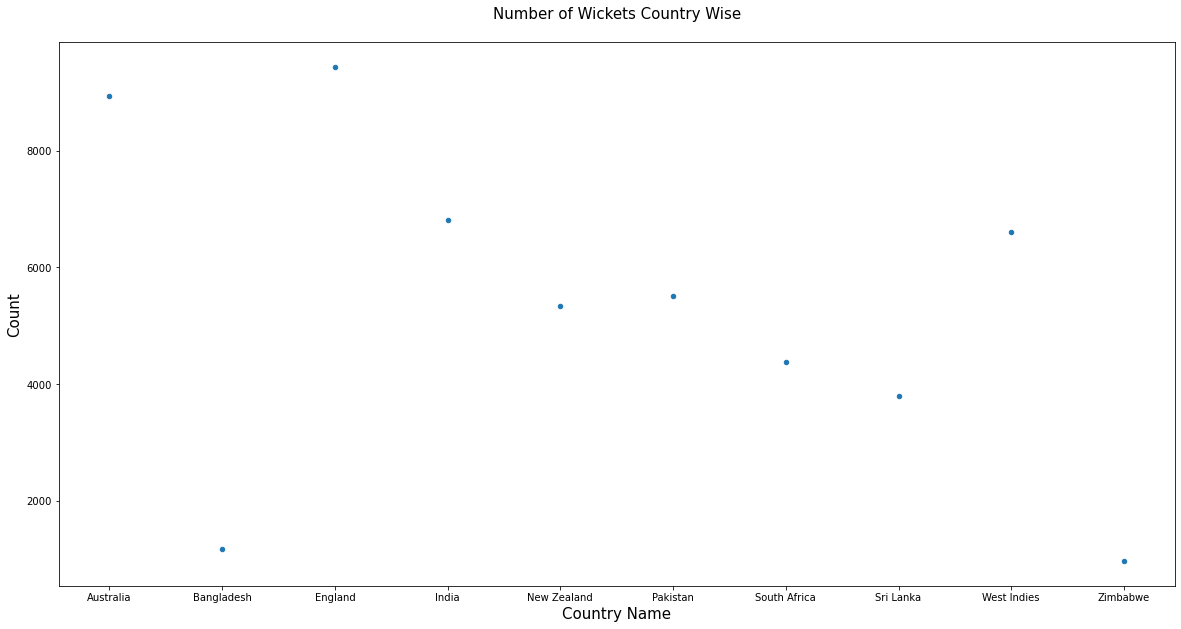

In [9]:
# Plotting a Bar Graph for Country vs Wickets count(i.e grouping each country players wickets)
ax = df.plot(x="Country", y="count", kind="scatter", fontsize=10, figsize=(20,10))
ax.set_title('Number of Wickets Country Wise\n', fontsize=15)
ax.set_xlabel('Country Name', fontsize=15)
ax.set_ylabel('Count', fontsize=15);
plt.show()

### MIlestone 3 Data - Web Data insertion into the database.

In [21]:
dbfile = 'mydata.sqlite'
# Calling dbconnect file.
conn = db_connect(dbfile)

if conn is not None:
    c = conn.cursor()

    ## Creating a table.
    c.execute('CREATE TABLE IF NOT EXISTS WEBSITE_DATA_MS3 ' 
   '(Bowler_Name VARCHAR,'
    'Country VARCHAR,'
    'Period VARCHAR,'
    'Matches VARCHAR,'
    'Innings VARCHAR,'
    'Balls VARCHAR,'
    'Wickets VARCHAR,'
    'Runs VARCHAR,'
    'Average VARCHAR,'
    'Economy VARCHAR,'
    'Strike_Rate VARCHAR,'
    'BBI VARCHAR,'
    'BBM VARCHAR,'
    'five_Wkt_Haul VARCHAR,'
    'ten_Wkt_Haul VARCHAR)')

    # Creat a data frame using WEBSITE data converted to CSV file.

    df = pd.read_csv('Bowler_Stats_WEBSITE_MS3.csv', names = ["Bowler_Name","Country","Period","Matches","Innings","Balls","Wickets","Runs","Average","Economy","Strike_Rate","BBI","BBM","five_Wkt_Haul","ten_Wkt_Haul"])

    df.to_sql(name='WEBSITE_DATA_MS3', con=conn, if_exists='replace', index=False)

    conn.close()
    print('SQL insert process finished')
else:
    print('Connection to database failed')

SQL insert process finished


In [22]:
# Connect to the Database.
conn = db_connect(dbfile)
# Initialise the variable to execute queries.
c = conn.cursor()
# To check the number of records from Website- milestone3 table.
rows = c.execute("SELECT count(*) FROM WEBSITE_DATA_MS3")
for row in rows:
    print(row)

(37,)


In [23]:
# To check the number of records from website- milestone3 table
dbq="SELECT bowler_name, sum(ten_Wkt_Haul) as count FROM WEBSITE_DATA_MS3 where country<>'Country' and wickets > 400 group by bowler_name"

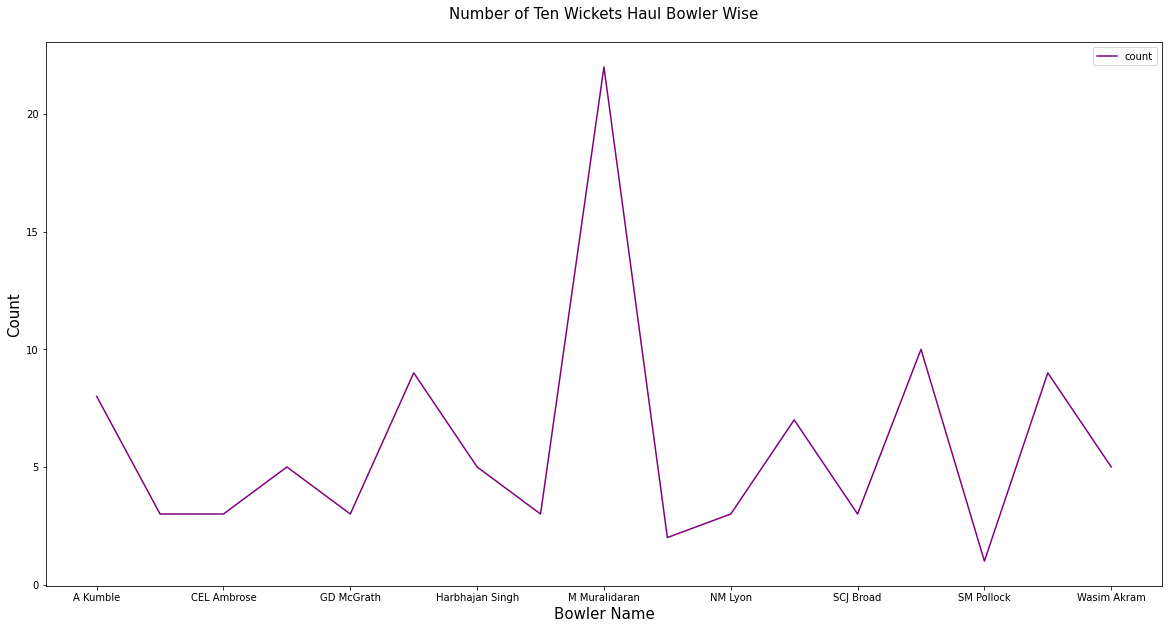

In [25]:
# Plotting a Bar Graph for Bowler Name vs 10 Wickets haul count(i.e grouping each country players wickets)
df = pd.read_sql_query(dbq,conn)
ax = df.plot(x="Bowler_Name", y="count", kind="line",color = 'purple', fontsize=10, figsize=(20,10))
ax.set_title('Number of Ten Wickets Haul Bowler Wise\n', fontsize=15)
ax.set_xlabel('Bowler Name', fontsize=15)
ax.set_ylabel('Count', fontsize=15);
plt.show()

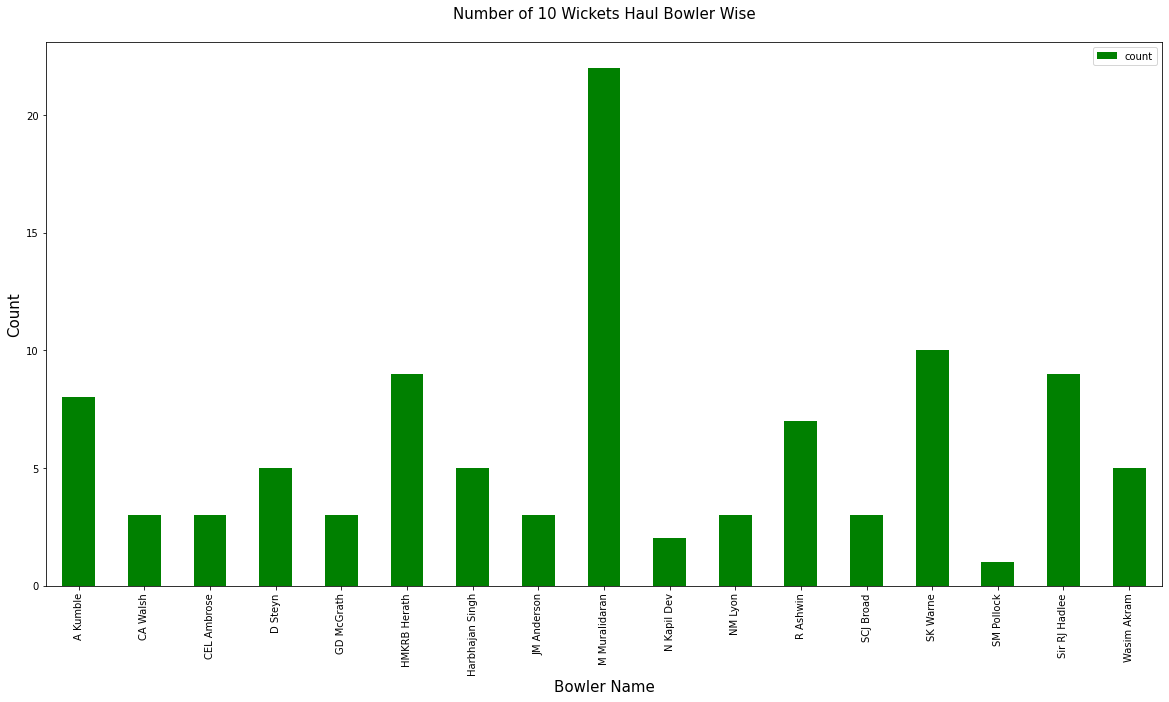

In [26]:
# Plotting a Bar Graph for Bowler Name vs 10 Wickets Haul count(i.e grouping each country players wickets)
ax = df.plot(x="Bowler_Name", y="count", kind="bar",color = 'green', fontsize=10, figsize=(20,10))
ax.set_title('Number of 10 Wickets Haul Bowler Wise\n', fontsize=15)
ax.set_xlabel('Bowler Name', fontsize=15)
ax.set_ylabel('Count', fontsize=15);
plt.show()

### MIlestone 4 Data - API Data

In [17]:
dbfile = 'mydata.sqlite'
# Calling dbconnect file.
conn = db_connect(dbfile)

if conn is not None:
    c = conn.cursor()

    # Creating a table.
    c.execute('CREATE TABLE IF NOT EXISTS API_DATA_MS4 ' 
   '(Id VARCHAR,'
    'Bowler_Name VARCHAR,'
    'Matches VARCHAR,'
    'Overs VARCHAR,'
    'Wickets VARCHAR,'
    'Average VARCHAR,'
    'Country VARCHAR)')

    # Creat a data frame using API data converted into a csv file.

    df = pd.read_csv('Bowler_Stats_API_MS4.csv', names = ['Id', 'Bowler_Name', 'Matches', 'Overs', 'Wickets', 'Average','Country'])

    df.to_sql(name='API_DATA_MS4', con=conn, if_exists='replace', index=False)

    conn.close()
    print('SQL insert process finished')
else:
    print('Connection to database failed')

SQL insert process finished


In [27]:
# Connect to the Database
conn = db_connect(dbfile)
# Initialise the variable to execute queries
c = conn.cursor()
# Check the number of records from api- milestone3 table
rows = c.execute("SELECT count(*) FROM API_DATA_MS4")
for row in rows:
    print(row)

(101,)


In [28]:
# To check the nuber of records from milestone4 table
dbq="SELECT country, sum(wickets) as count FROM API_DATA_MS4 where country<>'Country' group by country"

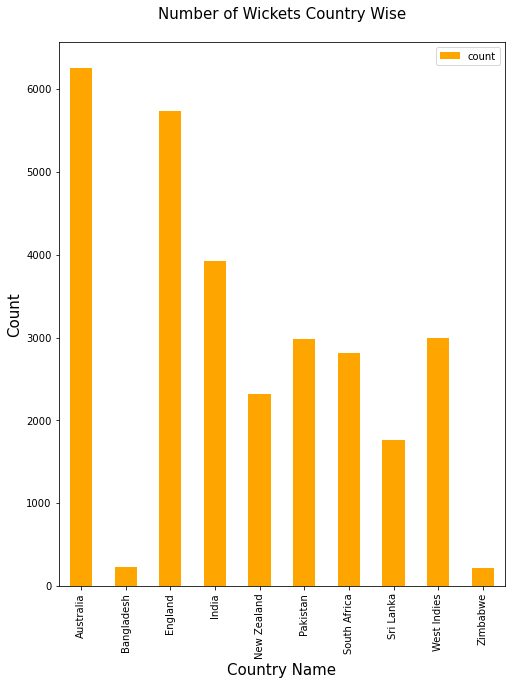

In [29]:
# Plotting a Bar Graph for Country vs Wickets count(i.e grouping each country players wickets)
df = pd.read_sql_query(dbq,conn)
ax = df.plot(x="Country", y="count", kind="bar",color = 'Orange', fontsize=10, figsize=(8,10))
ax.set_title('Number of Wickets Country Wise\n', fontsize=15)
ax.set_xlabel('Country Name', fontsize=15)
ax.set_ylabel('Count', fontsize=15);
plt.show()

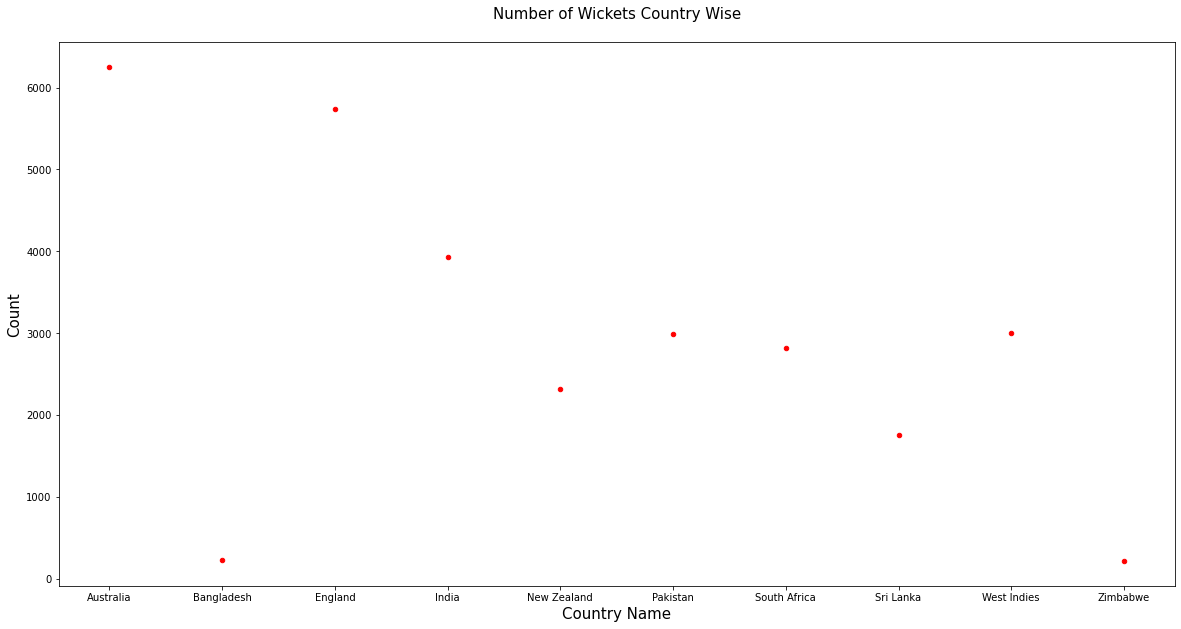

In [30]:
# Plotting a Bar Graph for Country vs Wickets count(i.e grouping each country players wickets)
ax = df.plot(x="Country", y="count", kind="scatter",color = 'red', fontsize=10, figsize=(20,10))
ax.set_title('Number of Wickets Country Wise\n', fontsize=15)
ax.set_xlabel('Country Name', fontsize=15)
ax.set_ylabel('Count', fontsize=15);
plt.show()

### Check the common data from all the three tables - taking 2 tables

In [31]:
#Check for the common data from Flatfile milestone2 data and Website milestone3 data.
rows = c.execute("SELECT count(*) FROM FLATFILE_DATA_MS2 a, WEBSITE_DATA_MS3 b where a.Bowler_Name = b.Bowler_Name")
for row in rows:
    print(row)
    
#Check for the common data from Website milestone3 data and Api milestone4 data.
rows = c.execute("SELECT count(*) FROM WEBSITE_DATA_MS3 a, API_DATA_MS4 b where a.Bowler_Name = b.Bowler_Name")
for row in rows:
    print(row)
    
#Check for the common data from Api milestone4 data and Flatfile milestone2 data.
rows = c.execute("SELECT count(*) FROM API_DATA_MS4 a, FLATFILE_DATA_MS2 b where a.Bowler_Name = b.Bowler_Name")
for row in rows:
    print(row)
    
#Check for the common data from Flatfile milestone2 data and Website milestone3 data.
rows = c.execute("SELECT count(*) FROM FLATFILE_DATA_MS2 a left join WEBSITE_DATA_MS3 b on a.Bowler_Name = b.Bowler_Name")
for row in rows:
    print(row)
    
#Check for the common data from Website mileston3 data and Api milestone4 data
rows = c.execute("SELECT count(*) FROM WEBSITE_DATA_MS3 a left join API_DATA_MS4 b on a.Bowler_Name = b.Bowler_Name")
for row in rows:
    print(row)
    
#Check for the common data from Api milestone4 data and Flatfile milestone2 data
rows = c.execute("SELECT count(*) FROM API_DATA_MS4 a left join FLATFILE_DATA_MS2 b on a.Bowler_Name = b.Bowler_Name")
for row in rows:
    print(row)

(35,)
(35,)
(91,)
(563,)
(37,)
(101,)


### Plotting Visualizations from the tables.

In [32]:
# Import matplotlib library.
import matplotlib.pyplot as plt

In [37]:
# Plots using matplotlib.
# Creating a function for data visualization.
def data_visualization(tabdata1, tabdata2, graph):
    dbq = 'SELECT ' + tabdata1 + '.Country,' 
    dbq = dbq + ' count( '+ tabdata1 + '.wickets) as count FROM ' + tabdata1 + ' left join ' 
    dbq = dbq + tabdata2 + ' on '+tabdata1+'.Bowler_Name = '+tabdata2+'.Bowler_Name'
    dbq = dbq + ' where '+ tabdata1 + '.Country is not null group by '
    dbq = dbq + tabdata1 + '.Country'

    df = pd.read_sql_query(dbq,conn)
     
    # Plot a BAR graph if the variable passed is BARPLOT 
    if graph == 'BARPLOT':
        ax = df.plot(x="Country", y="count", kind="bar", fontsize=10, figsize=(8,10),color = "purple")
        ax.set_title('Number of Wickets Country Wise\n', fontsize=15)
        ax.set_xlabel('Country', fontsize=15)
        ax.set_ylabel('Count of Wickets', fontsize=15);
        plt.show()
    # Plot a SCATTER PLOT if the variable passed is SCATTER
    elif graph == 'SCATTER':    
        ax = df.plot(x="Country", y="count", kind="scatter", fontsize=10, figsize=(20,10),color = "orange")
        ax.set_title('Number of Wickets Country Wise\n', fontsize=15)
        ax.set_xlabel('Country', fontsize=15)
        ax.set_ylabel('Count of Wickets', fontsize=15);
        plt.show()
    # Plot a LINE graph if the variable passed is LINEPLOT
    elif graph == 'LINEPLOT':
        ax = df.plot(x="Country", y="count", fontsize=10, figsize=(8,10),color = "green")
        ax.set_title('Number of Wickets Country Wise\n', fontsize=15)
        ax.set_xlabel('Country', fontsize=15)
        ax.set_ylabel('Count of Wickets', fontsize=15);
        plt.show()

In [38]:
# Assigning Table names for all the three tables created.
tabdata1 = 'FLATFILE_DATA_MS2'
tabdata2 = 'WEBSITE_DATA_MS3'
tabdata3 = 'API_DATA_MS4'

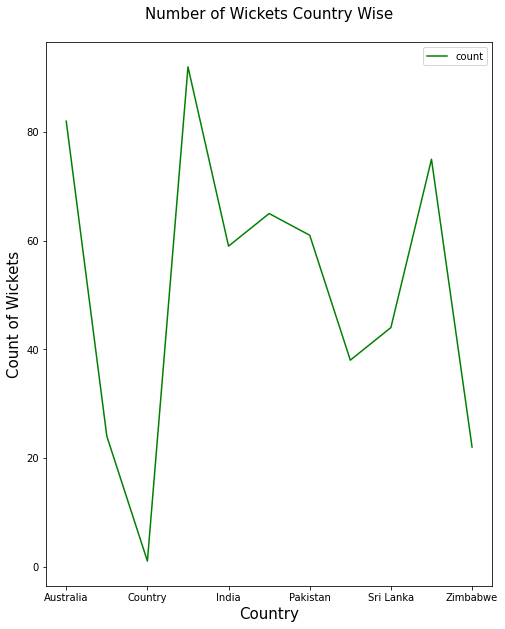

In [39]:
# Call function to plot a line plot using the data from table data 1 and table data 2.
graph = 'LINEPLOT'
data_visualization(tabdata1, tabdata2, graph)

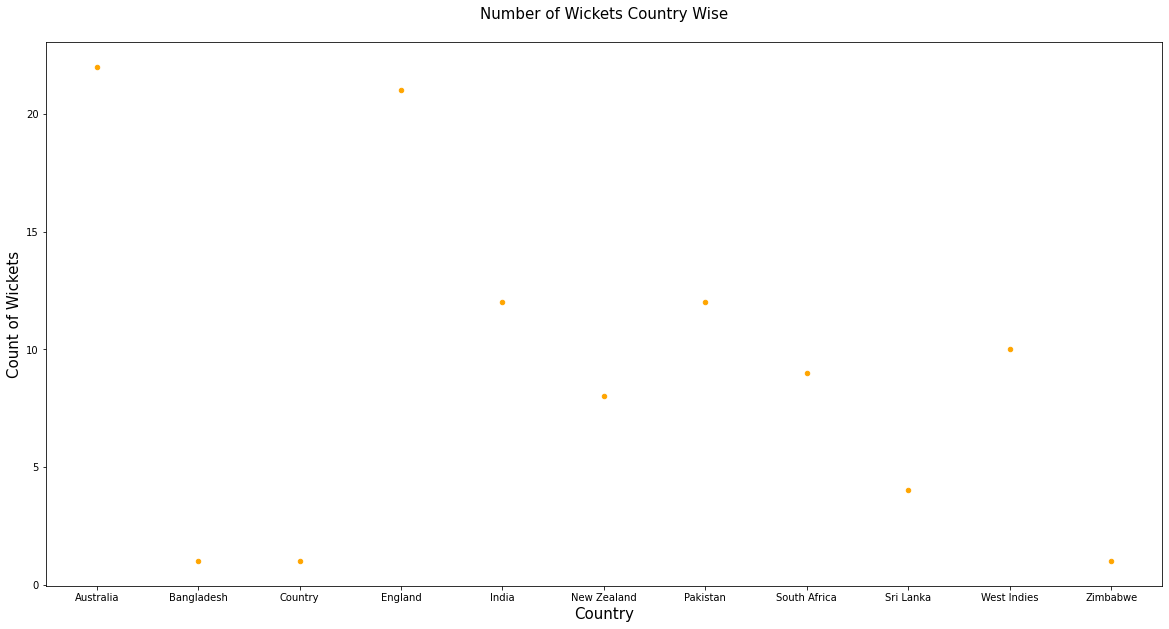

In [40]:
# Call function to Plot a scatter plot using tabke data 3 and tabke data 1.
graph = 'SCATTER'
data_visualization(tabdata3, tabdata1, graph)

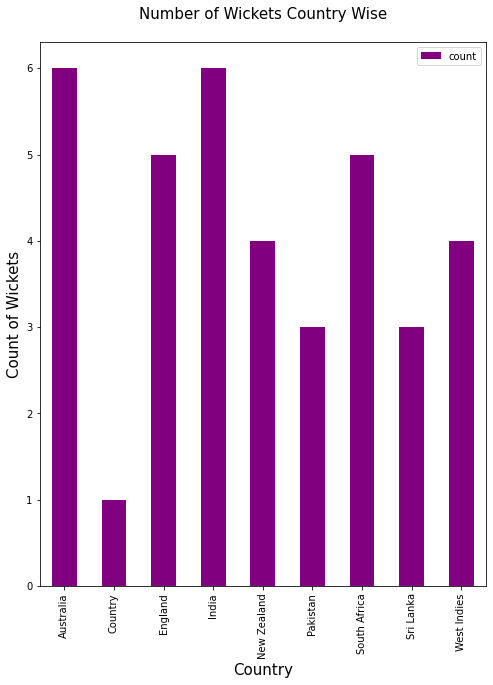

In [41]:
# Call function to plot a Bar graph, using the table data 2 and table data 3.
graph = 'BARPLOT'
data_visualization(tabdata2, tabdata3, graph)

### Human readable data of all the three tables.

In [42]:
#Flat file data.
rows = c.execute("SELECT * FROM FLATFILE_DATA_MS2")
for row in rows:
    print(row)

('Bowler_Name', 'Span', 'Debut_Year', 'Retirement_Year', 'Matches', 'Innings', 'Balls', 'Runs', 'Wickets', 'Average', 'Economy', 'Strike_Rate', '5_Wkt_Haul', '10_Wkt_Haul', 'Country')
('M Muralidaran', '1992-2010', '1992', '2010', '133', '230', '44039', '18180', '800', '22.72', '2.47', '55', '67', '22', 'Sri Lanka')
('SK Warne', '1992-2007', '1992', '2007', '145', '273', '40705', '17995', '708', '25.41', '2.65', '57.4', '37', '10', 'Australia')
('JM Anderson', '2003-2022', '2003', '2022', '171', '318', '36832', '17219', '651', '26.45', '2.8', '56.5', '31', '3', 'England')
('A Kumble', '1990-2008', '1990', '2008', '132', '236', '40850', '18355', '619', '29.65', '2.69', '65.9', '35', '8', 'India')
('GD McGrath', '1993-2007', '1993', '2007', '124', '243', '29248', '12186', '563', '21.64', '2.49', '51.9', '29', '3', 'Australia')
('SCJ Broad', '2007-2022', '2007', '2022', '154', '284', '31085', '15230', '546', '27.89', '2.93', '56.9', '19', '3', 'England')
('CA Walsh', '1984-2001', '1984', 

('MD Crowe', '1982-1995', '1982', '1995', '77', '35', '1377', '676', '14', '48.28', '2.94', '98.3', '0', '0', 'New Zealand')
('JDS Neesham', '2014-2017', '2014', '2017', '12', '21', '1076', '675', '14', '48.21', '3.76', '76.8', '0', '0', 'New Zealand')
('MJ North', '2009-2010', '2009', '2010', '21', '19', '1258', '591', '14', '42.21', '2.81', '89.8', '1', '0', 'Australia')
('Haris Sohail', '2017-2021', '2017', '2021', '16', '17', '630', '294', '13', '22.61', '2.8', '48.4', '0', '0', 'Pakistan')
('RO Hinds', '2002-2009', '2002', '2009', '15', '22', '1743', '870', '13', '66.92', '2.99', '134', '0', '0', 'West Indies')
('Khaled Mahmud', '2001-2003', '2001', '2003', '12', '17', '1620', '832', '13', '64', '3.08', '124.6', '0', '0', 'Bangladesh')
('M Labuschagne', '2018-2022', '2018', '2022', '26', '35', '1080', '663', '13', '51', '3.68', '83', '0', '0', 'Australia')
('SK Raina', '2010-2015', '2010', '2015', '18', '22', '1041', '603', '13', '46.38', '3.47', '80', '0', '0', 'India')
('RS Kalp

In [43]:
# Website data.
rows = c.execute("SELECT * FROM WEBSITE_DATA_MS3")
for row in rows:
    print(row)

('Bowler_Name', 'Country', 'Period', 'Matches', 'Innings', 'Balls', 'Wickets', 'Runs', 'Average', 'Economy', 'Strike_Rate', 'BBI', 'BBM', '5_Wkt_Haul', '10_Wkt_Haul')
('M Muralidaran', 'Sri Lanka', '1992-2010', '133', '230', '44039', '800', '18180', '22.72', '2.47', '55', 'Sep-51', '16/220', '67', '22')
('SK Warne', 'Australia', '1992-2007', '145', '273', '40705', '708', '17995', '25.41', '2.65', '57.4', 'Aug-71', '12/128', '37', '10')
('JM Anderson', 'England', '2003-present', '172', '320', '37077', '657', '17325', '26.36', '2.8', '56.4', 'Jul-42', 'Nov-71', '32', '3')
('A Kumble', 'India', '1990-2008', '132', '236', '40850', '619', '18355', '29.65', '2.69', '65.9', 'Oct-74', '14/149', '35', '8')
('GD McGrath', 'Australia', '1993-2007', '124', '243', '29248', '563', '12186', '21.64', '2.49', '51.9', '24-Aug', '27-Oct', '29', '3')
('SCJ Broad', 'England', '2007-present', '156', '288', '31571', '552', '15502', '28.08', '2.94', '57.1', '15-Aug', '11/121', '19', '3')
('CA Walsh', 'West In

In [44]:
# API data.
rows = c.execute("SELECT * FROM API_DATA_MS4")
for row in rows:
    print(row)

('Id', 'Bowler_Name', 'Matches', 'Overs', 'Wickets', 'Average', 'Country')
('110', 'M Muralidaran', '133', '7339.5', '800', '22.73', 'Sri Lanka')
('135', 'SK Warne', '145', '6784.1', '708', '25.42', 'Australia')
('65', 'JM Anderson', '172', '6179.3', '657', '26.37', 'England')
('98', 'A Kumble', '132', '6808.2', '619', '29.65', 'India')
('41', 'GD McGrath', '124', '4874.4', '563', '21.64', 'Australia')
('554', 'SCJ Broad', '156', '5261.5', '552', '28.08', 'England')
('4194', 'CA Walsh', '132', '5003.1', '519', '24.45', 'West Indies')
('1593', 'R Ashwin', '86', '3848.1', '442', '24.13', 'India')
('508', 'DW Steyn', '93', '3101.2', '439', '22.95', 'South Africa')
('7850', 'NM Lyon', '110', '4763.5', '438', '32.07', 'Australia')
('3838', 'N Kapil Dev', '131', '4623.2', '434', '29.65', 'India')
('277', 'HMRKB Herath', '93', '4332', '433', '28.08', 'Sri Lanka')
('3997', 'Sir RJ Hadlee', '86', '3461.4', '431', '22.3', 'New Zealand')
('218', 'SM Pollock', '108', '4058.5', '421', '23.12', 'Sou

### Printing the consolidated data from all the three tables into human readdable format.

In [45]:
rows = c.execute("SELECT Bowler_Name, Span, 'Debut_Year', 'Retirement_Year', 'Matches', 'Innings', 'Balls', 'Runs', 'Wickets', 'Average', 'Economy', 'Strike_Rate', '5_Wkt_Haul', '10_Wkt_Haul', 'Country' FROM FLATFILE_DATA_MS2")
for row in rows:
    print(row)


('Bowler_Name', 'Span', 'Debut_Year', 'Retirement_Year', 'Matches', 'Innings', 'Balls', 'Runs', 'Wickets', 'Average', 'Economy', 'Strike_Rate', '5_Wkt_Haul', '10_Wkt_Haul', 'Country')
('M Muralidaran', '1992-2010', 'Debut_Year', 'Retirement_Year', 'Matches', 'Innings', 'Balls', 'Runs', 'Wickets', 'Average', 'Economy', 'Strike_Rate', '5_Wkt_Haul', '10_Wkt_Haul', 'Country')
('SK Warne', '1992-2007', 'Debut_Year', 'Retirement_Year', 'Matches', 'Innings', 'Balls', 'Runs', 'Wickets', 'Average', 'Economy', 'Strike_Rate', '5_Wkt_Haul', '10_Wkt_Haul', 'Country')
('JM Anderson', '2003-2022', 'Debut_Year', 'Retirement_Year', 'Matches', 'Innings', 'Balls', 'Runs', 'Wickets', 'Average', 'Economy', 'Strike_Rate', '5_Wkt_Haul', '10_Wkt_Haul', 'Country')
('A Kumble', '1990-2008', 'Debut_Year', 'Retirement_Year', 'Matches', 'Innings', 'Balls', 'Runs', 'Wickets', 'Average', 'Economy', 'Strike_Rate', '5_Wkt_Haul', '10_Wkt_Haul', 'Country')
('GD McGrath', '1993-2007', 'Debut_Year', 'Retirement_Year', 'Ma

('Yuvraj Singh', '2003-2012', 'Debut_Year', 'Retirement_Year', 'Matches', 'Innings', 'Balls', 'Runs', 'Wickets', 'Average', 'Economy', 'Strike_Rate', '5_Wkt_Haul', '10_Wkt_Haul', 'Country')
('Azhar Ali', '2010-2022', 'Debut_Year', 'Retirement_Year', 'Matches', 'Innings', 'Balls', 'Runs', 'Wickets', 'Average', 'Economy', 'Strike_Rate', '5_Wkt_Haul', '10_Wkt_Haul', 'Country')
('MC Carew', '1963-1972', 'Debut_Year', 'Retirement_Year', 'Matches', 'Innings', 'Balls', 'Runs', 'Wickets', 'Average', 'Economy', 'Strike_Rate', '5_Wkt_Haul', '10_Wkt_Haul', 'Country')
('MJ Guptill', '2009-2016', 'Debut_Year', 'Retirement_Year', 'Matches', 'Innings', 'Balls', 'Runs', 'Wickets', 'Average', 'Economy', 'Strike_Rate', '5_Wkt_Haul', '10_Wkt_Haul', 'Country')
('Nasir Hossain', '2011-2017', 'Debut_Year', 'Retirement_Year', 'Matches', 'Innings', 'Balls', 'Runs', 'Wickets', 'Average', 'Economy', 'Strike_Rate', '5_Wkt_Haul', '10_Wkt_Haul', 'Country')
('GC Smith', '2002-2014', 'Debut_Year', 'Retirement_Year',

In [46]:
query="SELECT Bowler_Name,Country,Matches,Innings,Balls, Wickets,Runs,Average,Economy,Strike_Rate,five_Wkt_Haul,ten_Wkt_Haul,Span, Debut_Year,Retirement_Year,'','','','','','FLATFILE_DATA_MS2' as DataSource FROM FLATFILE_DATA_MS2 union SELECT Bowler_Name, Country,  Matches, Innings, Balls, Wickets, Runs, Average, Economy, Strike_Rate, BBI, BBM, five_Wkt_Haul, ten_Wkt_Haul,'','','',Period,'','','WEBSITE_DATA_MS3' as DataSource FROM WEBSITE_DATA_MS3 union SELECT Bowler_Name,Country, Matches, '','', Wickets, '',Average,'','','','','','','','','','',Id,Overs,'API_DATA_MS4' as DataSource FROM API_DATA_MS4"

In [47]:
consolidateData = pd.read_sql_query(query, conn)

In [48]:
consolidateData.head(20)

,Bowler_Name,Country,Matches,Innings,Balls,Wickets,Runs,Average,Economy,Strike_Rate,...,ten_Wkt_Haul,Span,Debut_Year,Retirement_Year,'','','','','',DataSource
0,A Flintoff,England,79,,,226,,32.79,,,...,,,,,,,,61,2491.5,API_DATA_MS4
1,A Flintoff,England,79,137,14951,226,7410,32.78,2.97,66.1,...,0,1998-2009,1998,2009,,,,,,FLATFILE_DATA_MS2
2,A Kumble,India,132,,,619,,29.65,,,...,,,,,,,,98,6808.2,API_DATA_MS4
3,A Kumble,India,132,236,40850,619,18355,29.65,2.69,65.9,...,8,1990-2008,1990,2008,,,,,,FLATFILE_DATA_MS2
4,A Kumble,India,132,236,40850,619,18355,29.65,2.69,65.9,...,14/149,35,8,,,,1990-2008,,,WEBSITE_DATA_MS3
5,A Mishra,India,22,40,5103,76,2715,35.72,3.19,67.1,...,0,2008-2016,2008,2016,,,,,,FLATFILE_DATA_MS2
6,A Nehra,India,17,29,3447,44,1866,42.4,3.24,78.3,...,0,1999-2004,1999,2004,,,,,,FLATFILE_DATA_MS2
7,A Nel,South Africa,36,69,7630,123,3919,31.86,3.08,62,...,1,2001-2008,2001,2008,,,,,,FLATFILE_DATA_MS2
8,A Nortje,South Africa,12,21,2182,47,1321,28.1,3.63,46.4,...,0,2019-2021,2019,2021,,,,,,FLATFILE_DATA_MS2
9,A Ranatunga,Sri Lanka,93,56,2373,16,1040,65,2.62,148.3,...,0,1982-2000,1982,2000,,,,,,FLATFILE_DATA_MS2
